**Импорт библиотек**

In [13]:
import numpy as np
import pandas as pd
from IPython.display import Image
import os
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering

**Импорт датасета**

In [3]:
df = pd.read_csv('dataset.csv')

**Основная ифнормация о файле**

In [ ]:
print('Количество строк и столбцов: ', df.shape)

Количество строк и столбцов:  (200, 5)


In [ ]:
print('Названия столбцов: ', df.columns)

Названия столбцов:  Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [ ]:
print('Количество уникальных значений в столбце Age: ', df['Age'].nunique(),
      '\nУникальные значения в столбце Age: ', df['Age'].unique())

Количество уникальных значений в столбце Age:  51 
Уникальные значения в столбце Age:  [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]


In [ ]:
print('Количество уникальных значений в столбце Gender: ', df['Gender'].nunique(),
      '\nУникальные значения в столбце Gender: ', df['Gender'].unique())

Количество уникальных значений в столбце Gender:  2 
Уникальные значения в столбце Gender:  ['Male' 'Female']


In [ ]:
print('Количество уникальных значений в столбце Annual Income(k$): ', df['Annual Income (k$)'].nunique(),
      '\nУникальные значения в столбце Annual Income(k$): ', df['Annual Income (k$)'].unique())

Количество уникальных значений в столбце Annual Income(k$):  64 
Уникальные значения в столбце Annual Income(k$):  [ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]


In [ ]:
print('Количество уникальных значений в столбце Spending Score (1-100): ', df['Spending Score (1-100)'].nunique(),
      '\nУникальные значения в столбце Spending Score (1-100): ', df['Spending Score (1-100)'].unique())

Количество уникальных значений в столбце Spending Score (1-100):  84 
Уникальные значения в столбце Spending Score (1-100):  [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


In [ ]:
print('Количество пропущенных значений в столбцах:\n', df.isnull().sum())

Количество пропущенных значений в столбцах:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe(pd.set_option('display.float_format', '{:.1f}'.format))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.5,38.9,60.6,50.2
std,57.9,14.0,26.3,25.8
min,1.0,18.0,15.0,1.0
25%,50.8,28.8,41.5,34.8
50%,100.5,36.0,61.5,50.0
75%,150.2,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [ ]:
fig = go.Figure(data=go.Scatter(
    x=df['Age'],
    y=df['Gender'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['Annual Income (k$)'],
        colorscale='Viridis',
        opacity=0.5,
        colorbar=dict(
            title="Annual Income (k$)",
            tickvals=[df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()],
            ticktext=[f"< {df['Annual Income (k$)'].min():.0f}k$", f"> {df['Annual Income (k$)'].max():.0f}k$"]
        )
    )
))
fig.update_layout(
    title='Рассеянная диаграмма',
    xaxis_title='Age',
    yaxis_title='Gender',
    bargap=0.1
)
fig.show()

**Кластеризация данных**

In [10]:
X = df.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


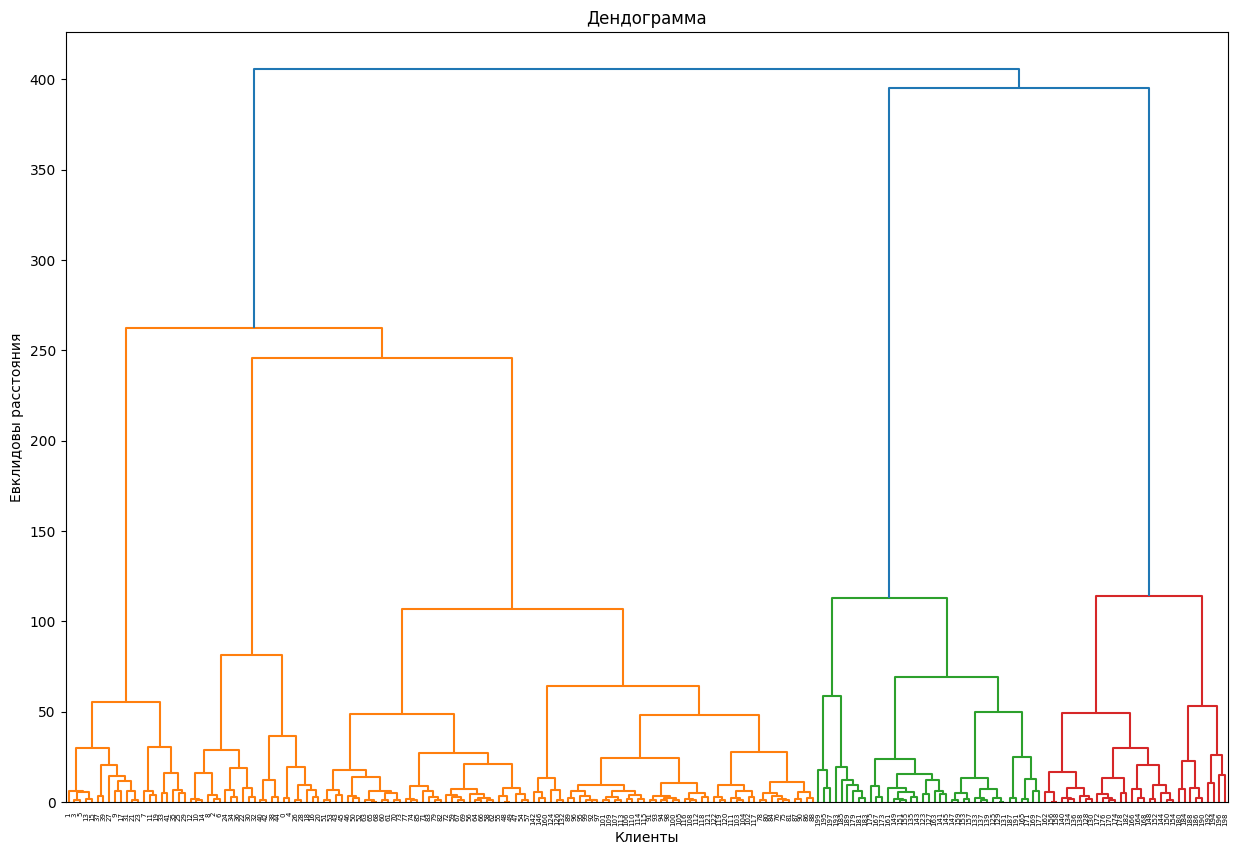

In [5]:
rcParams['figure.figsize'] = 15, 10
dendogram  = hc.dendrogram(hc.linkage(data_analis, method = 'ward'))
plt.title('Дендограмма')
plt.xlabel('Клиенты')
plt.ylabel('Евклидовы расстояния')
plt.show()

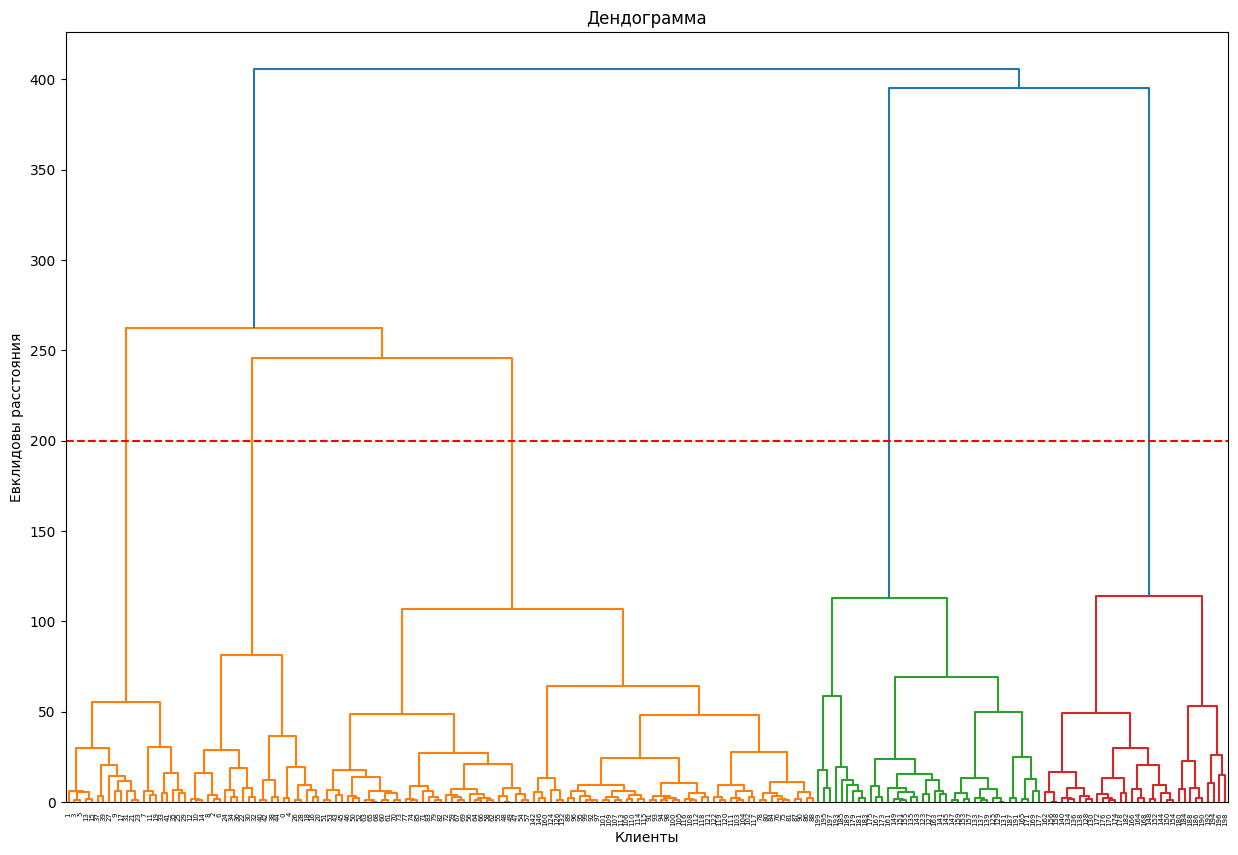

In [6]:
dendogram  = hc.dendrogram(hc.linkage(data_analis, method = 'ward'))
plt.title('Дендограмма')
plt.xlabel('Клиенты')
plt.ylabel('Евклидовы расстояния')
plt.axhline(200, c='r', linestyle='--')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


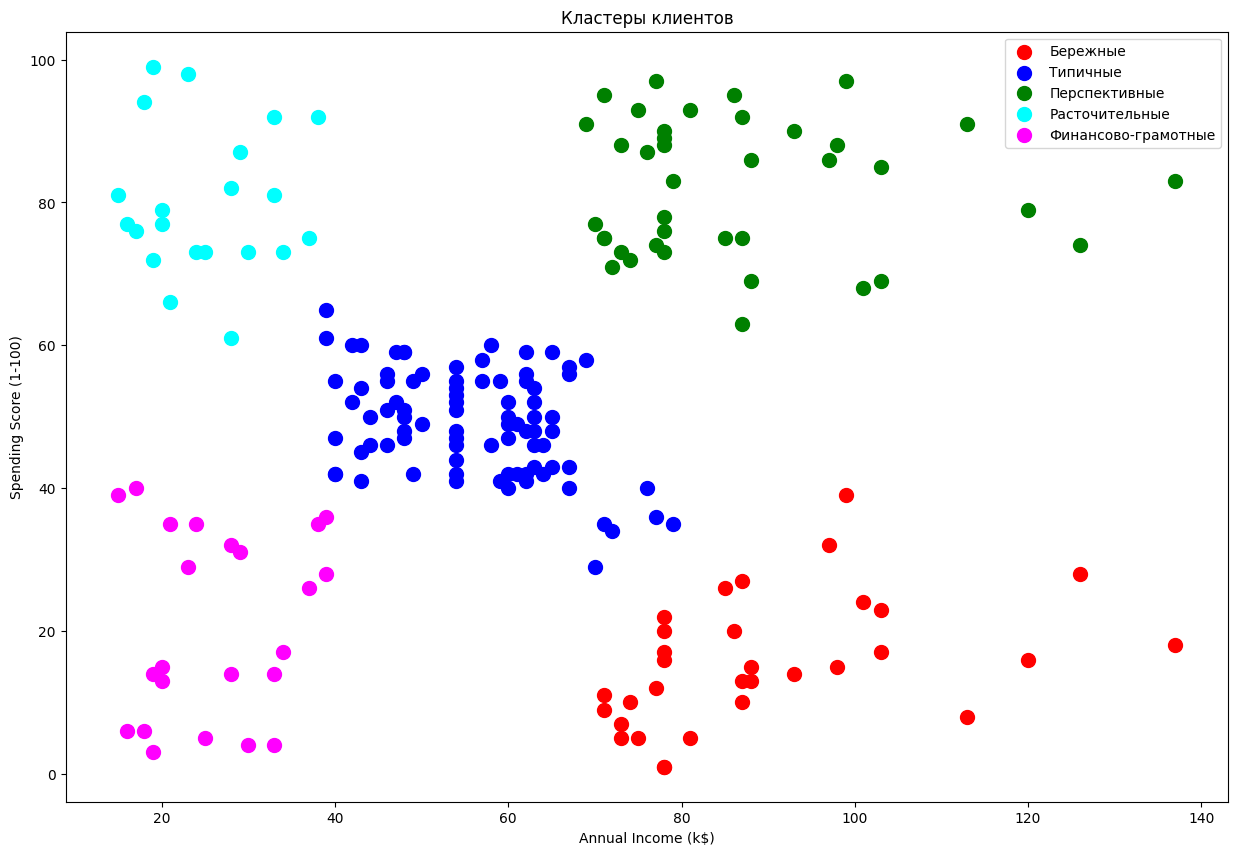

In [14]:
hc_Agg = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc_Agg.fit_predict(X)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Бережные')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Типичные')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Перспективные')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Расточительные')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Финансово-грамотные')
plt.title('Кластеры клиентов')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()